# Named Entity recognition (secondary task of the project)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_csv('new_cop26_data.csv',index_col=0)
df.head()


,url,og_url,domain,title,description,content,entities,authors,paywall,fb_total,...,is_homepage,is_document,http_code,feeds,cat_id,cat_score,outbound_link_ids,inbound_link_ids,pub_day,pub_hour
id,,,,,,,,,,,,,,,,,,,,,
KQe1r321ZaJY,https://www.abcnyheter.no/nyheter/norge/2021/1...,https://www.abcnyheter.no/a/195798411/,www.abcnyheter.no,Færre vil møte klimakrisen med tiltak som i ko...,Andelen som vil ha like kraftige tiltak mot kl...,"Samtidig som klimatoppmøtet i Glasgow starter,...","['Glasgow', 'Fokus', 'Norge', 'Klimatoppmøtet'...",NaN,NaN,0,...,NaN,False,200,NaN,154.0,0.963856,NaN,NaN,2021-10-31,23
jnegLMrLkawZ,https://www.ao.no/oslo-fergenes-siste-dag-pa-f...,https://www.ao.no/5-128-204411,www.ao.no,(+) Oslo-Fergenes siste dag på fjorden: – Det ...,Siden 1917 har Oslo-Fergene fraktet turister o...,"Øyene, Ferger | Oslo-Fergenes siste dag på fjo...",NaN,['Sevda Barazesh'],1.0,1,...,NaN,False,200,NaN,NaN,NaN,NaN,['LDdwm7PORa1Y'],2021-10-31,23
Jrb2vD34MbWL,https://www.abcnyheter.no/nyheter/verden/2021/...,https://www.abcnyheter.no/a/195798410/,www.abcnyheter.no,25 drept i raid mot bankrøvere i Brasil,25 antatte medlemmer av en bande bankrøvere bl...,50 politifolk deltok i operasjonen mot to gård...,"['bandemedlemmene', 'Rodolfo Morotti Fernandes...",NaN,NaN,0,...,NaN,False,200,NaN,65.0,1.000018,NaN,NaN,2021-10-31,23
xkazKYRPqbJ0,https://norgeogverdensnytt.blogg.no/sandra-lyn...,NaN,norgeogverdensnytt.blogg.no,Sandra Lyng (34) har fått korona,AV/ NorgeOgVerdensNytt Foto: Mauricio E...,AV/ NorgeOgVerdensNytt Foto: Mauricio Evensen ...,"['Mauricio Evensen', 'Sandra Lyng', 'Lyngs', '...",['norgeogverdensnytt'],NaN,0,...,NaN,False,200,NaN,127.0,0.714142,NaN,NaN,2021-10-31,23
Vyb86KpPrevA,https://www.vg.no/nyheter/utenriks/i/V959MJ/ab...,https://www.vg.no/i/V959MJ,www.vg.no,Aborttilgangen tørker inn – nå skal Texas-love...,MEMPHIS (VG) I sørstatene skyves nå kvinner fr...,FORBEREDELSER: Joy Evans er såkalt «patient ed...,"['Texas', 'Roe', 'Wade', 'Memphis', 'Webb', 'H...",NaN,NaN,0,...,NaN,False,200,NaN,168.0,0.683313,['nXe0VD5vNbxr'],['lNbW7oZOEbyg'],2021-10-31,23


### Tokenization using spacy

In [3]:
#importing Norwegian (Bokmål) pipeline optimized for CPU - nb_core_news_lg
import spacy
nlp = spacy.load('nb_core_news_lg')

In [4]:
#dependency parsing ,the visualization below shows the dependency structure of the text in title for row 0.
#from spacy import displacy
#doc = nlp(df.title[0]) 
#print(doc)
#displacy.serve(doc, style="dep")

The the output below showsthe entities that have been recognized by the language model. In this cases the language model has recognised word that is location types.

In [5]:
#Analyzing entities
doc = nlp(df.title[12])
spacy.displacy.render(doc, style="ent")
doc_nouns = list(doc.noun_chunks)
print(doc_nouns)

[tenåringsjente, Hun, de som tente på i Drammen]


In [6]:
[(i, i.label_) for i in doc.ents]

[(Drammen, 'GPE_LOC')]

Applying tokenization to the complete column of 'title' .
The goal here is to transform the unstructured title column into a structured table of data based on each word. 

In [7]:
#apply the spaCy language model to the entire collection of titles.
docs = list(nlp.pipe(df.title))


In [48]:
#defining functions for tokenization, lemmatization, entities and POS TAGGING
def extract_tokens_(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc."""
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_,i.is_stop,i.is_punct ) for i in doc
    ]

def table_tokens(docs):          
    """Extract tokens and metadata from list of spaCy docs."""
    
    cols = [
        "doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag","is_stop",  "is_punct"]
    
    meta_df = []
    for ix, doc in enumerate(docs):
        meta = extract_tokens_(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)
        
    return pd.concat(meta_df)    


In [49]:
new_table= table_tokens(docs)

In [50]:
new_table.head(35)

,doc_id,token,token_order,lemma,ent_type,tag,is_stop,is_punct
0,0,Færre,0,Færre,,NOUN,False,False
1,0,vil,1,vil,,AUX,True,False
2,0,møte,2,møte,,VERB,False,False
3,0,klimakrisen,3,klimakrise,,NOUN,False,False
4,0,med,4,med,,ADP,True,False
5,0,tiltak,5,tiltak,,NOUN,False,False
6,0,som,6,som,,PRON,True,False
7,0,i,7,i,,ADP,True,False
8,0,koronapandemien,8,koronapandemie,,NOUN,False,False
0,1,(,0,(,,PUNCT,False,True


In [51]:
#saving a new dataset
new_table.to_csv('new_table.csv')

In [52]:
new_table=pd.read_csv('new_table.csv',index_col=0)

In [54]:
# extracting entities
new_table.query("ent_type != ''").ent_type.value_counts()

PER        26590
ORG        22019
GPE_LOC    16772
LOC         8409
DRV         7573
PROD        4997
GPE_ORG     3057
EVT          648
MISC          92
Name: ent_type, dtype: int64

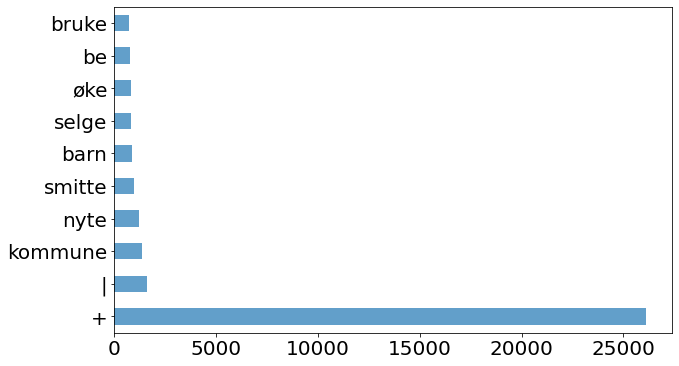

In [55]:
#top words in titles
new_table.query("is_stop == False & is_punct == False").lemma.value_counts().head(10).plot(kind="barh", figsize=(10, 6), alpha=.7)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20);

### Extracting Locations

In [61]:
# Filtering data to find top discussed locations
filterinfDataframe = new_table[(new_table['ent_type'] == "GPE_LOC")]
filterinfDataframe

,doc_id,token,token_order,lemma,ent_type,tag,is_stop,is_punct
7,2,Brasil,7,Brasil,GPE_LOC,PROPN,False,False
6,5,Brasil,6,Brasil,GPE_LOC,PROPN,False,False
16,12,Drammen,16,Drammen,GPE_LOC,PROPN,False,False
16,13,Drammen,16,Drammen,GPE_LOC,PROPN,False,False
6,15,Brasil,6,Brasil,GPE_LOC,PROPN,False,False
...,...,...,...,...,...,...,...,...
3,87043,Ringsted,3,Ringsted,GPE_LOC,PROPN,False,False
0,87047,Tyskland,0,Tyskland,GPE_LOC,PROPN,True,False
0,87051,Sverige,0,Sverige,GPE_LOC,PROPN,True,False
12,87058,Sandvikas,12,Sandvikas,GPE_LOC,PROPN,False,False


In [59]:
# prepare data
drop_cols = ['token_order','ent_type','tag','is_punct','is_stop','lemma']
dff = filterinfDataframe.drop(columns = drop_cols)
dff.head(5)

,doc_id,token
7,2,Brasil
6,5,Brasil
16,12,Drammen
16,13,Drammen
6,15,Brasil


Text(0.5, 1.0, 'Top 20 locations discussed in Norwegian new.')

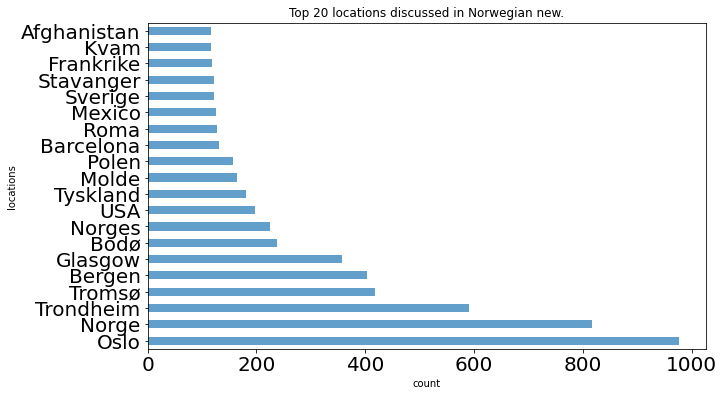

In [72]:
#plotting top 20 locations discussed in norwegian news
dff['token'].value_counts().head(20).plot(kind="barh", figsize=(10, 6), alpha=.7)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('count')
# Set the y axis label of the current axis.
plt.ylabel('locations')
# Set a title 
plt.title('Top 20 locations discussed in Norwegian new.')

In [62]:
dff['token']

7        Brasil
6        Brasil
16      Drammen
16      Drammen
6        Brasil
        ...    
3      Ringsted
0      Tyskland
0       Sverige
12    Sandvikas
0        Norges
Name: token, Length: 16772, dtype: object

### Extracting Nounss

In [74]:
Dataframe = new_table[(new_table['tag'] == "NOUN")]
Dataframe

,doc_id,token,token_order,lemma,ent_type,tag,is_stop,is_punct
0,0,Færre,0,Færre,NaN,NOUN,False,False
3,0,klimakrisen,3,klimakrise,NaN,NOUN,False,False
5,0,tiltak,5,tiltak,NaN,NOUN,False,False
8,0,koronapandemien,8,koronapandemie,NaN,NOUN,False,False
5,1,dag,5,dag,NaN,NOUN,True,False
...,...,...,...,...,...,...,...,...
3,87065,kommune,3,kommune,LOC,NOUN,False,False
0,87066,Statusoppdatering,0,Statusoppdatering,NaN,NOUN,False,False
2,87067,onlinelag,2,onlinelag,NaN,NOUN,False,False
6,87067,mandag,6,mandag,NaN,NOUN,True,False


Text(0.5, 1.0, 'Top 20 Nouns in a dataset.')

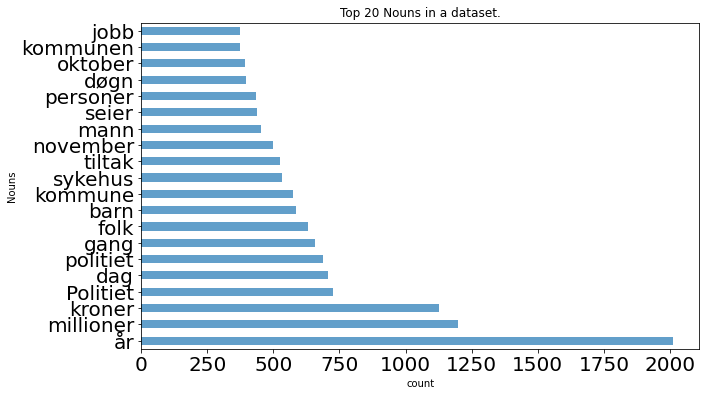

In [75]:
#top 20 noun words used in the title Norwegin news articles
Dataframe['token'].value_counts().head(20).plot(kind="barh", figsize=(10, 6), alpha=.7)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20);

plt.xlabel('count')
# Set the y axis label of the current axis.
plt.ylabel('Nouns')
# Set a title 
plt.title('Top 20 Nouns in a dataset.')


### Extracting personalities

In [76]:
Dataframee = new_table[(new_table['ent_type'] == "PER")]
Dataframee

,doc_id,token,token_order,lemma,ent_type,tag,is_stop,is_punct
0,3,Sandra,0,Sandra,PER,PROPN,False,False
1,3,Lyng,1,Lyng,PER,PROPN,False,False
5,14,Kristus,5,Kristus,PER,PROPN,False,False
3,22,Sanna,3,Sanna,PER,PROPN,False,False
3,26,Tobarnsmor,3,Tobarnsmor,PER,PROPN,False,False
...,...,...,...,...,...,...,...,...
6,87008,Bakke,6,Bakke,PER,PROPN,False,False
0,87018,Bolsonaro,0,Bolsonaro,PER,PROPN,False,False
4,87044,Kevin,4,Kevin,PER,PROPN,False,False
0,87062,Beth,0,Beth,PER,PROPN,False,False


Text(0.5, 1.0, 'Top 20 personlities discussed in Norwegian new.')

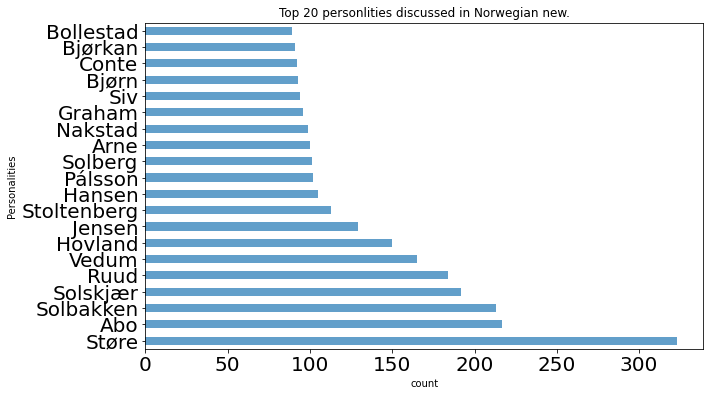

In [77]:
#top 20 personalities discussed in norwegain news
Dataframee['token'].value_counts().head(20).plot(kind="barh", figsize=(10, 6), alpha=.7)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20);
plt.xlabel('count')
# Set the y axis label of the current axis.
plt.ylabel('Personalities')
# Set a title 
plt.title('Top 20 personlities discussed in Norwegian new.')

## Extracting Organizations

In [80]:
organi = new_table[(new_table['ent_type'] == "ORG")]
organi

,doc_id,token,token_order,lemma,ent_type,tag,is_stop,is_punct
9,4,Høyesterett,9,Høyesterett,ORG,PROPN,False,False
0,7,Macron,0,Macron,ORG,PROPN,False,False
5,28,Transport,5,transport,ORG,NOUN,False,False
6,28,&,6,&,ORG,CCONJ,False,True
7,28,Logistikk,7,Logistikk,ORG,PROPN,False,False
...,...,...,...,...,...,...,...,...
0,87063,Strømstans,0,strømstans,ORG,NOUN,False,False
1,87064,Odd,1,Odd,ORG,PROPN,False,False
0,87065,Strømstans,0,strømstans,ORG,NOUN,False,False
12,87067,Tromsø,12,Tromsø,ORG,PROPN,False,False


<AxesSubplot:>

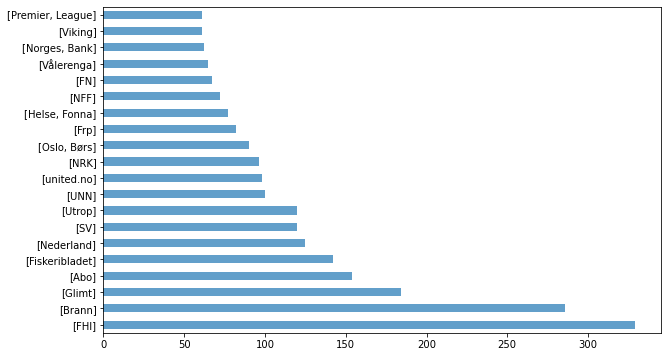

In [81]:
df_org = new_table[new_table.ent_type=='ORG']

df_org.groupby('doc_id')['token'].apply(list).value_counts().head(20).plot(kind="barh", figsize=(10, 6), alpha=.7)

In [29]:
tidy_docs.groupby(['Personalities'])